In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import networkx as nx

import matplotlib.pyplot as plt
import random
import json
import community as community_louvain

import numpy as np


In [4]:
path = '/Users/qing/Desktop/24s1/comp8880/project/code/data/soc-delicious/soc-delicious.mtx'

G = read_directed_graph(path,1)

In [6]:
with open('saved/network_metrics_deli.json', 'r') as f:
    loaded_data = json.load(f)

# 访问加载的数据
sorted_centrality = loaded_data["Centrality"]
#sorted_betweenness = loaded_data["Betweenness"]
#sorted_closeness = loaded_data["Closeness"]
sorted_pagerank =  loaded_data["PageRank"]
#sorted_leaderRank =  loaded_data["LeaderRank"]
sorted_hIndex =  loaded_data["HIndex"]
sorted_kShell=  loaded_data["KShell"]
# 更多的访问可以根据需要添加


In [7]:

print(sorted_hIndex[:3])
#print(loaded_betweenness)


[['133136', 126], ['116370', 122], ['115043', 119]]


2.5479213143620316


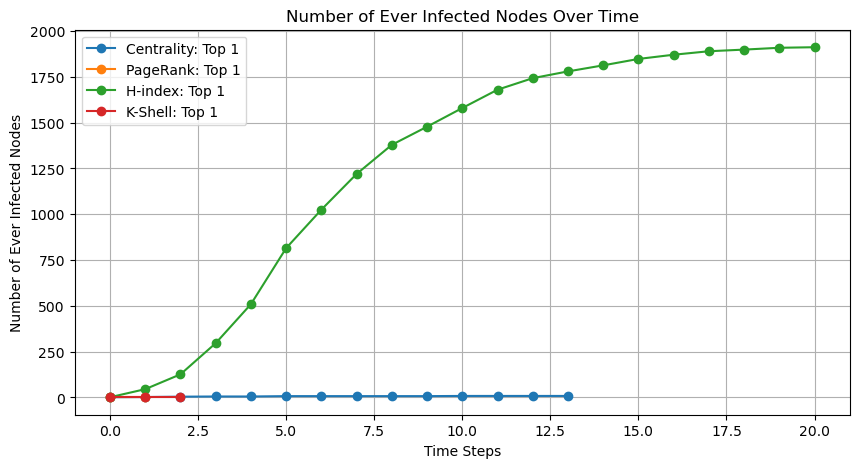

In [15]:

def plot_sir_simulation(G, sorted_maps, top, infection_prob=0.1, steps=100):
    plt.figure(figsize=(10, 5))

    # Calculate average in-degree
    avg_in_degree = sum(dict(G.in_degree()).values()) / G.number_of_nodes()
    print(avg_in_degree)
    recovery_prob = 1 / avg_in_degree

    # Iterate through all sorted maps
    for name, sorted_map in sorted_maps.items():
        top_nodes = [node for node, _ in sorted_map[:top]]  # Extract top nodes
        history, ever_infected, infected_counts = SIR_simulation(G, top_nodes, infection_prob, recovery_prob, steps)
        plt.plot(infected_counts, marker='o', linestyle='-', label=f'{name}: Top {top}')

    plt.title('Number of Ever Infected Nodes Over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Ever Infected Nodes')
    plt.grid(True)
    plt.legend()
    plt.show()

def SIR_simulation(G, initial_infected, infection_prob=0.5, recovery_prob=0.05, steps=100):
    # Initialize the status of each node
    status = {node: 'S' for node in G.nodes()}
    for node in initial_infected:
        status[node] = 'I'

    history = []
    ever_infected = set(initial_infected)
    infected_counts = [len(ever_infected)]  # Initial number of infected nodes

    # Simulation process
    for _ in range(steps):
        new_status = status.copy()
        for node in G.nodes():
            if status[node] == 'I':
                for neighbor in G.neighbors(node):
                    if status[neighbor] == 'S' and random.random() < infection_prob:
                        new_status[neighbor] = 'I'
                        ever_infected.add(neighbor)
                if random.random() < recovery_prob:
                    new_status[node] = 'R'
        history.append(new_status)
        status = new_status
        infected_counts.append(len(ever_infected))  # Record the total number of infected nodes

        if not any(s == 'I' for s in status.values()):
            break

    return history, ever_infected, infected_counts

# Example usage:
# G = nx.DiGraph()  # Your graph here
# sorted_maps = {'LeaderRank': leader_rank_sorted, 'PageRank': page_rank_sorted}  # Your sorted maps here
# plot_sir_simulation(G, sorted_maps, top=20)
sorted_maps = {
    "Centrality": sorted_centrality,
    #"Betweenness": sorted_betweenness,
    #"Closeness": sorted_closeness,
    "PageRank": sorted_pagerank,
    #"LeaderRank": sorted_leaderRank,
    "H-index": sorted_hIndex,
    "K-Shell": sorted_kShell
}


# 运行模拟并绘图
plot_sir_simulation(G, sorted_maps,top=1, steps=20)

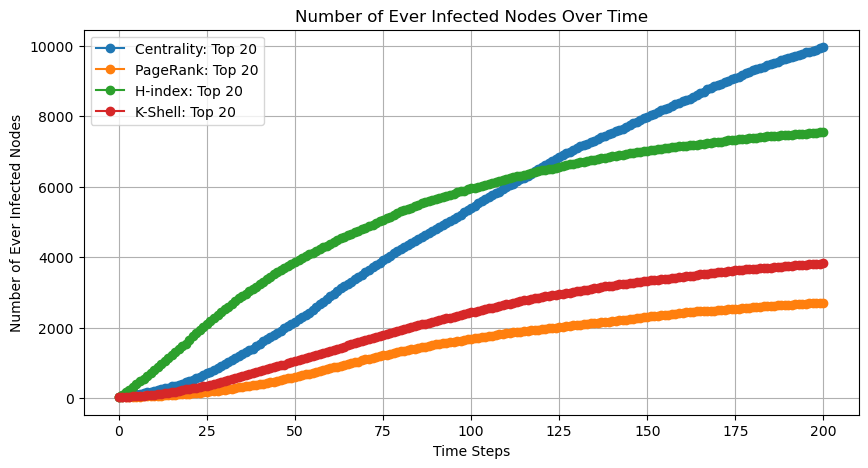

In [20]:
sorted_maps = {
    "Centrality": sorted_centrality,
    #"Betweenness": sorted_betweenness,
    #"Closeness": sorted_closeness,
    "PageRank": sorted_pagerank,
    #"LeaderRank": sorted_leaderRank,
    "H-index": sorted_hIndex,
    "K-Shell": sorted_kShell
}


# 运行模拟并绘图
plot_sir_simulation(G, sorted_maps,20, infection_prob=0.01, recovery_prob=0.01, steps=200)

In [4]:
def plot_sir_simulation(G, sorted_maps, top, infection_prob=0.1, recovery_prob=0.01, steps=100):
    plt.figure(figsize=(10, 5))

    # 遍历所有排序map
    for name, sorted_map in sorted_maps.items():
        top_nodes = [node for node, _ in sorted_map[:top]]  # 提取前top个节点
        history, ever_infected, infected_counts = SIR_simulation(G, top_nodes, infection_prob, recovery_prob, steps)
        plt.plot(infected_counts, marker='o', linestyle='-', label=f'{name}: Top {top}')

    plt.title('Number of Ever Infected Nodes Over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Ever Infected Nodes')
    plt.grid(True)
    plt.legend()
    plt.show()
    
def SIR_simulation(G, initial_infected, infection_prob=0.05, recovery_prob=0.05, steps=100):
    # 状态初始化
    status = {node: 'S' for node in G.nodes()}
    for node in initial_infected:
        status[node] = 'I'

    history = []
    ever_infected = set(initial_infected)
    infected_counts = [len(ever_infected)]  # 初始感染者数量

    # 模拟过程
    for _ in range(steps):
        new_status = status.copy()
        for node in G.nodes():
            if status[node] == 'I':
                for neighbor in G.neighbors(node):
                    if status[neighbor] == 'S' and random.random() < infection_prob:
                        new_status[neighbor] = 'I'
                        ever_infected.add(neighbor)
                if random.random() < recovery_prob:
                    new_status[node] = 'R'
        history.append(new_status)
        status = new_status
        infected_counts.append(len(ever_infected))  # 记录当前步骤的感染者总数

        if not any(s == 'I' for s in status.values()):
            break

    return history, ever_infected, infected_counts


In [3]:
def read_directed_graph(file_path, skip_lines):
    G = nx.DiGraph()  # Initialize an empty directed graph
    with open(file_path, 'r') as file:
        for _ in range(skip_lines):
            next(file)  # Skip the initial descriptive lines
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:  # Only consider lines with exactly two node identifiers
                u, v = parts
                G.add_edge(u, v)
    
    return G


def leader_rank(G2):

    # Add the ground node connected to all other nodes
    ground_node = 'ground'
    G = G2.copy()
    G.add_node(ground_node)
    for node in set(G.nodes()) - {ground_node}:
        G.add_edge(ground_node, node)

    # Initialize scores to 1 for all nodes except the ground node
    scores = {node: 1 for node in G.nodes()}

    # Power iteration: iterate until convergence
    iterations = 100  # Set a suitable number of iterations
    damping = 0.85    # Usually a damping factor is not used, but can be if desired
    for _ in range(iterations):
        new_scores = {node: 0 for node in G.nodes()}
        for node in G.nodes():
            for neighbor in G.neighbors(node):
                new_scores[neighbor] += scores[node] / len(list(G.neighbors(node)))
        new_scores[ground_node] = 1 - damping + damping * new_scores[ground_node]
        scores = new_scores

    # Remove the ground node score and normalize the scores
    del scores[ground_node]
    total_score = sum(scores.values())
    scores = {node: score / total_score for node, score in scores.items()}
    
    return scores


def calculate_h_index(G):
    h_index = {}
    for node in G.nodes():
        degrees = [G.degree(neighbor) for neighbor in G.neighbors(node)]
        degrees.sort(reverse=True)
        h = 0
        for i, degree in enumerate(degrees):
            if degree >= i + 1:
                h = i + 1
            else:
                break
        h_index[node] = h
    return h_index


In [ ]:
# Initialize an empty directed graph

# Load the .mtx file
path = '/Users/qing/Desktop/24s1/comp8880/project/code/data/soc-delicious/soc-delicious.mtx'

G = read_directed_graph(path,1)
# Calculate number of nodes and edges in the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

num_nodes, num_edges

centrality = nx.degree_centrality(G)
#betweenness_manual = nx.betweenness_centrality(G)
#closeness_manual = nx.closeness_centrality(G)
pagerank = nx.pagerank(G, alpha=0.85, personalization=None)
#leaderRank = leader_rank(G)
hIndex = calculate_h_index(G)
kShell = nx.core_number(G)

sorted_centrality = sorted(centrality.items(), key=lambda item: item[1], reverse=True)
#sorted_betweenness = sorted(betweenness_manual.items(), key=lambda item: item[1], reverse=True)
#sorted_closeness = sorted(closeness_manual.items(), key=lambda item: item[1], reverse=True)
sorted_pagerank =  sorted(pagerank.items(), key=lambda item: item[1], reverse=True)
#sorted_leaderRank =  sorted(leaderRank.items(), key=lambda item: item[1], reverse=True)
sorted_hIndex =  sorted(hIndex.items(), key=lambda item: item[1], reverse=True)
sorted_kShell=  sorted(kShell.items(), key=lambda item: item[1], reverse=True)

data_to_save = {
    "Centrality": sorted_centrality,
    #"Betweenness": sorted_betweenness,
    #"Closeness": sorted_closeness,
    "PageRank": sorted_pagerank,
    #"LeaderRank": sorted_leaderRank,
    "HIndex": sorted_hIndex,
    "KShell": sorted_kShell
}

with open('saved/network_metrics_deli.json', 'w') as f:
    json.dump(data_to_save, f, indent=4)